## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("/home/jovyan/work/flight_price.xlsx")

In [3]:
df.shape

(10683, 11)

## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
import matplotlib.pyplot as plt

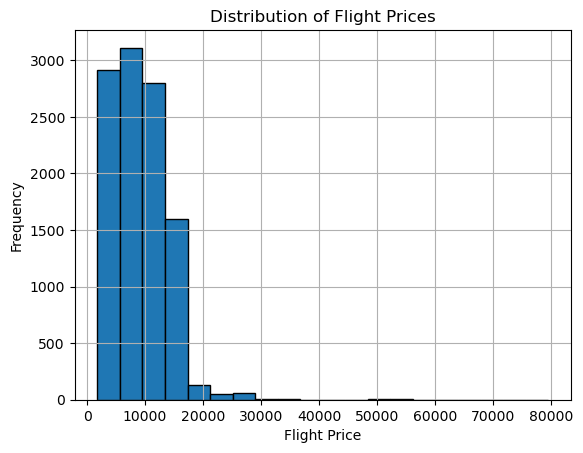

In [6]:
plt.hist(df['Price'], bins=20, edgecolor="black") 
plt.xlabel("Flight Price")
plt.ylabel("Frequency")
plt.title("Distribution of Flight Prices")
plt.grid(True)
plt.show()

## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [7]:
min_price = df['Price'].min()
max_price = df['Price'].max()

print(f"Range of prices: ${max_price - min_price}")
print(f"Minimum price: ${min_price}")
print(f"Maximum price: ${max_price}")

Range of prices: $77753
Minimum price: $1759
Maximum price: $79512


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
import seaborn as sns
variation=df[["Airline","Price"]]

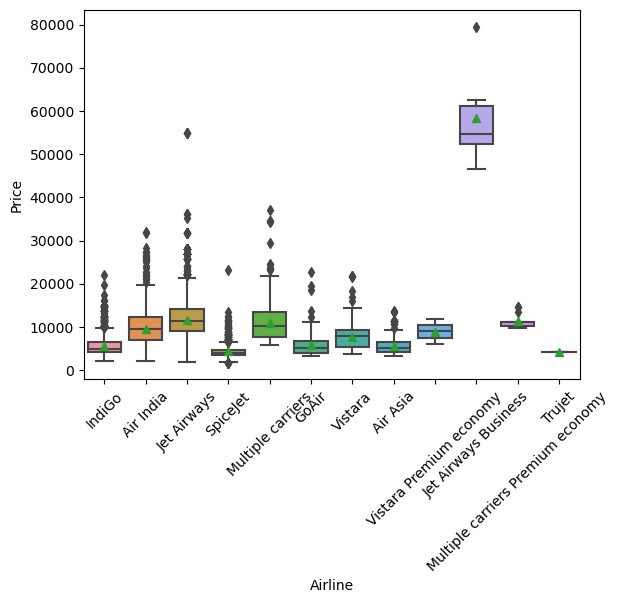

In [10]:
sns.boxplot(
    x = "Airline",
    y = "Price",
    showmeans=True,
    data=variation)

plt.xticks(rotation=45)
plt.show()

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<AxesSubplot: >

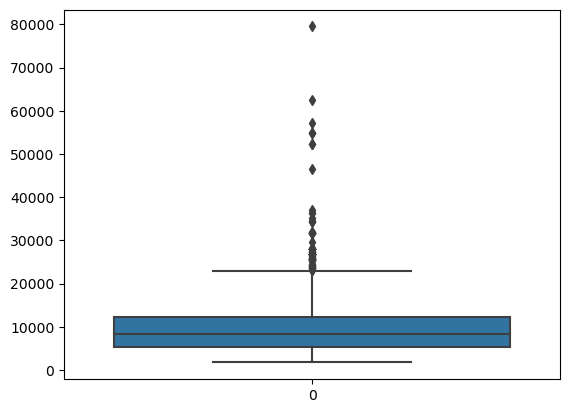

In [11]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Price'])

Impact :

Skewed summary statistics: Outliers can distort the mean and standard deviation, misrepresenting the typical flight prices.

Masked patterns: Outliers can obscure relationships between factors like distance and price, making it difficult to identify trends.

Affected model performance: Outliers can lead to inaccurate predictions in machine learning models trained on flight price data.

Inaccurate conclusions: Basing analysis solely on outlier-skewed data can lead to misleading interpretations and potentially poor decisions.

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [12]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year'],
      dtype='object')

In [15]:
peak=df[["Month","Destination","Price"]]

To analyze the peak travel season I would analyze the feature 'Month', 'Destination', 'Price'

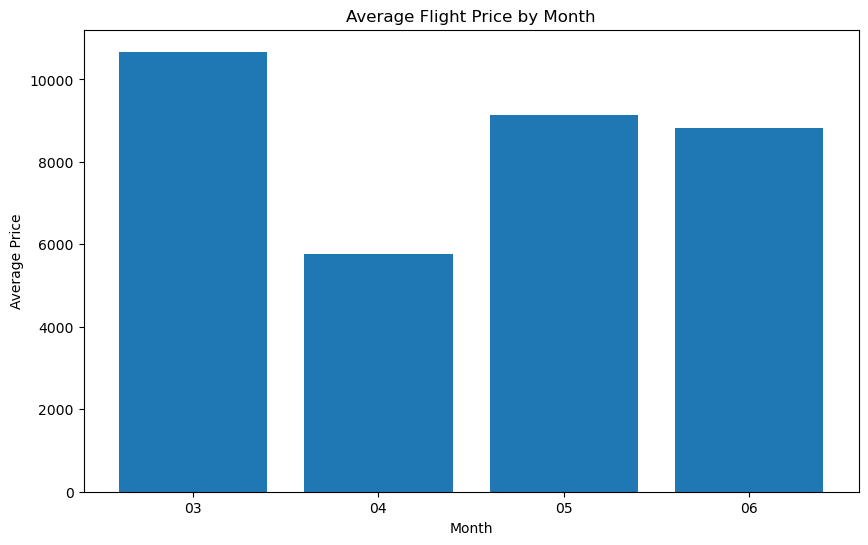

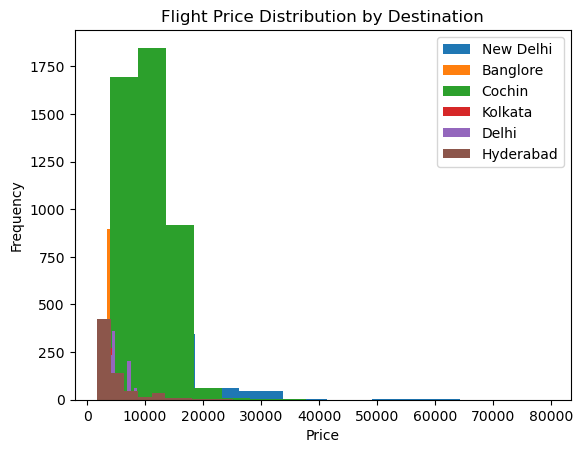

In [16]:
avg_price_month = peak.groupby("Month")["Price"].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_price_month.index, avg_price_month.values)
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average Flight Price by Month")
plt.show()

for destination in peak["Destination"].unique():
    destination_data = df[df["Destination"] == destination]
    plt.hist(destination_data["Price"], bins=10, label=destination)
plt.legend()
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Flight Price Distribution by Destination")
plt.show()

Findings :

Based on the graph, the peak travel season appears to be in March.

The Peak season is most probably the Summer.

Cochin Seems to be the favourite destination based on the frequence of the flight prices.

New Delhi is the costiliest destination for the travel.

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

Features I will use:

Time-based features:

Month: Analyze average, median, or distribution of prices across different months to identify seasonal trends.

Day of week: Check if prices differ across weekdays and weekends.

Time of day: Consider potential variations in prices for flights booked at different times (morning, afternoon, evening).

Destination: Destination city/country, Analyze price trends for popular or seasonal destinations.

Visualization I will use :

Time-based trends:

Line charts: Show the average or median price over time (month, day of week, hour).

Heatmaps: Visualize price variations across different months and days of the week.

Origin and Destination:

Scatter plots: Compare average prices from different origin cities to various destinations.

Bar charts: Compare average prices for different destinations from a specific origin.

Travel-related trends:

Boxplots: Compare price distributions across different travel classes, number of layovers, or airlines.

Histograms: Analyze the distribution of prices for each travel class or number of layovers.

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [17]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year'],
      dtype='object')

The features I would use to analyze the factors affecting the flight prices would be 'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Total_Stops'

Presenting finding to the management team :

Presenting Flight Price Factors to Management.

Key Findings.

Recommendations.

Examples.

Conclusion.

Any questions or doubts and further discussion .

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.shape

(10841, 13)

## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

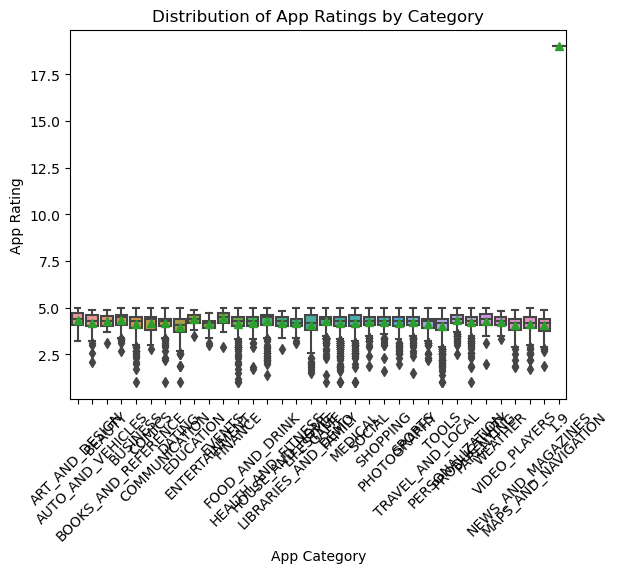

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(
    x = df["Category"],
    y = df["Rating"],
    showmeans=True,
    data=df
)

plt.xlabel("App Category")
plt.ylabel("App Rating")
plt.title("Distribution of App Ratings by Category")
plt.xticks(rotation=45)  
plt.show()

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [21]:
import pandas as pd
missing_values_count = df.isnull().sum()
print(missing_values_count)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


1474 missing values in a rating feature can significantly impact our analysis, especially :

It can render my finding unrealiable.

It can reduce the sample size and realiability of my analysis.

It can introduce bias towards categories with complete data.

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

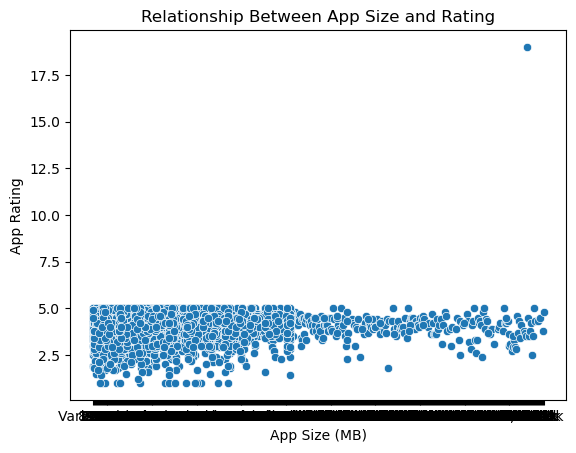

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.scatterplot(
    x = df["Size"],
    y = df["Rating"],
    data=df
)

plt.xlabel("App Size (MB)")
plt.ylabel("App Rating")
plt.title("Relationship Between App Size and Rating")
plt.show()

The graph suggests that there might be a weak positive correlation between app size and rating, but other factors likely play a more important role.

This means that as the size of the app increases, the rating also tends to increase slightly, but the spread of the data is significant, making it difficult to draw any definitive conclusions.

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [23]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [24]:
df['Type'] = df['Type'].map({'Free' : 1, 'Paid' : 2, '0' : 3})

In [25]:
df['Type'].value_counts()

1.0    10039
2.0      800
3.0        1
Name: Type, dtype: int64

In [26]:
import pandas as pd

def clean_price_column(df):

  df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''), errors='coerce')

 
  df.loc[df['Price'] == "Everyone", 'Price'] = 0.0

  return df


df = clean_price_column(df.copy())

/tmp/ipykernel_5106/4275212614.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''), errors='coerce')


In [27]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [28]:
type=df[["Type","Price"]]

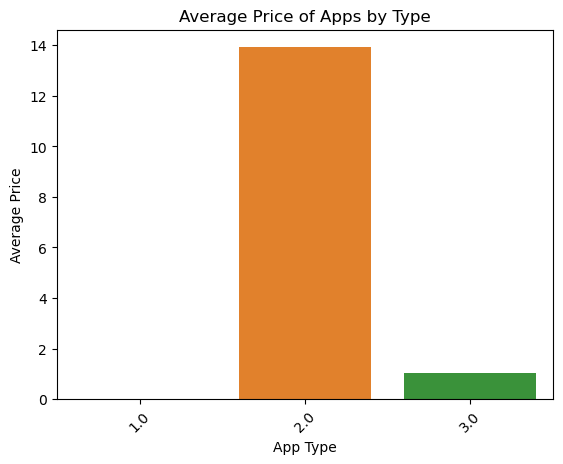

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

average_price_by_type = type.groupby('Type')['Price'].mean()

sns.barplot(
    x = average_price_by_type.index,
    y = average_price_by_type.values
)

plt.xlabel("App Type")
plt.ylabel("Average Price")
plt.title("Average Price of Apps by Type")
plt.xticks(rotation=45) 
plt.show()

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [30]:
import pandas as pd
app_installs_count = df['App'].value_counts().head(10)
print(app_installs_count)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64


## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",1.0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",1.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",1.0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",1.0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",1.0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


I would use the features 'Installs', 'Rating', 'Reviews', 'Category' to make recommendations to the company

Approach:

1. Data Exploration:

Load and Preprocess Data: Load the Google Playstore dataset into a suitable software like pandas. Handle missing values and format data appropriately.

Identify Popular Categories: Calculate the number of apps and/or downloads per category to understand which categories have the most apps or attract the most users.

2. Feature Analysis:

Analyze Category-Specific Metrics: Beyond total count, analyze metrics like average rating, average number of reviews, and average installs per app for each category. This provides insights into user engagement and potential app success within each category.

Consider User Demographics: Explore associations between popular categories and user demographics (if available in the dataset) like age, location, etc. This can help target specific user groups with the new app.

3. Recommendations:

Recommend Top Categories: Based on analysis, recommend the top categories with high app count, downloads, and positive engagement metrics.

Target User Segments: If user demographics are available, provide insights into which user segments are most likely to engage with apps in the identified categories.

4. Caveats:

Competition: Consider the level of competition within the recommended categories. High competition might require a unique selling proposition for the new app to succeed.

Market Trends: Investigate evolving market trends and user preferences to ensure the new app aligns with current demands.

Summary: This approach combines analyzing app count/downloads, user engagement metrics, and potential target user segments based on demographics (if available) to identify suitable app categories for the company's launch.

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Features for Identifying Successful App Developers:
Installs: Total number of downloads reflects app popularity and reach.

Active Users/MAU (Monthly Active Users): Measures ongoing user engagement.

Rating & Reviews: Reflects user satisfaction and app quality.

Content rating 

Data Visualizations:

Bar Charts: Compare downloads, MAU, or average rating across developers.

Scatter Plots: Visualize relationships between features (e.g., downloads vs. ratings).

Heatmaps: Explore correlations between app categories and developer success.

Stacked Bar Charts: Illustrate the distribution of downloads/revenue across developer categories.

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

. Feature Selection:

Partially Numerical Columns:

Installs: Likely contains numbers with text ("100,000+"). You can extract the numeric part using regular expressions or string manipulation techniques.
Last Updated: Might be convertible to datetime format if it follows a consistent pattern (e.g., "YYYY-MM-DD").
Non-Numerical Columns:

Category: Useful for understanding launch timing trends across different app categories.
Day of the Week & Time: Might be extractable from "Last Updated" if the format includes date and time information.
2. Data Preprocessing:

Extract numeric values: Use regular expressions or string manipulation to extract numbers from "Installs" (e.g., int(re.findall('\d+', installs_str)[0])).
Convert "Last Updated" to datetime: If possible, convert "Last Updated" to datetime format using pd.to_datetime().
Create new features: Based on the extracted or converted data, create new columns for:
Month of Launch: Extract month from datetime column (if created).
Day of Week: Extract day of the week from datetime column (if created).
Hour of Launch: Extract hour from datetime column (if created).
3. Analysis and Visualization:

Focus on categorical features and consider the following visualizations:

Bar Charts:
Compare average installs or user engagement metrics (derived from Reviews/Rating) across different launch months, days of the week, and hours.
Group apps by category and compare launch timing trends within each category.
Heatmaps:
Visualize the distribution of installs/engagement across days and times of the week, considering different categories (if possible).
Boxplots:
Compare the distribution of installs/engagement for different launch months.
Note:

In [46]:
#

In [47]:
#